## Store historical data

An easy way to store data is by saving it as a CSV file using pandas. Getting historic data from the IB API is straight forward. Start by importing the packages we need.

In [ ]:
import threading
import time

import pandas as pd

from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

This class creates the app. The app is what you use to interact with IB. This class inherits two classes from the IB API. If this doesn’t make sense, don’t worry. All we use it for in this case is collect historic data.

In [ ]:
class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = [] #Initialize variable to store candle

    def historicalData(self, reqId, bar):
        print(f'Time: {bar.date} Close: {bar.close}')
        self.data.append([bar.date, bar.close])

Next, create a function to run the app. Then, define a stock contract (IB calls everything a contract).

In [14]:
def run_loop():
    app.run()

def stock_contract(
    symbol,
    secType='STK',
    exchange='SMART',
    currency='USD'
):
    # create a stock contract
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.currency = currency

    return contract

Now, connect to the API, start the thread, and request the data.

ERROR -1 2104 Market data farm connection is OK:uscrypto
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


Time: 1667548800 Close: 138.96
Time: 1667552400 Close: 139.47
Time: 1667556000 Close: 139.82
Time: 1667559600 Close: 140.27
Time: 1667563200 Close: 141.67
Time: 1667566800 Close: 138.9
Time: 1667570400 Close: 138.19
Time: 1667574000 Close: 135.03
Time: 1667577600 Close: 134.8
Time: 1667581200 Close: 134.87
Time: 1667584800 Close: 136.76
Time: 1667588400 Close: 138.39
Time: 1667592000 Close: 138.18
Time: 1667595600 Close: 138.13
Time: 1667599200 Close: 138.2
Time: 1667602800 Close: 138.07
Time: 1667811600 Close: 136.75
Time: 1667815200 Close: 136.84
Time: 1667818800 Close: 136.27
Time: 1667822400 Close: 136.13
Time: 1667826000 Close: 136.85


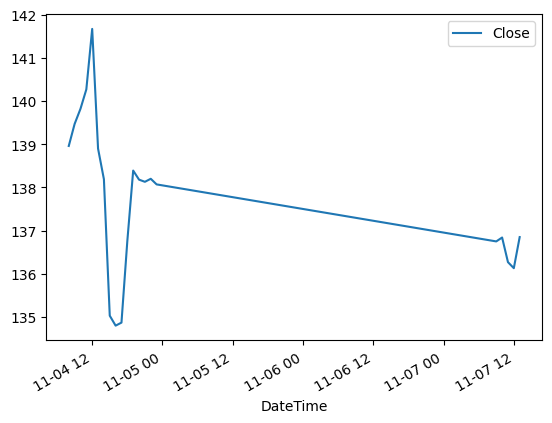

In [15]:
app = IBapi()
app.connect('127.0.0.1', 7496, 123)

api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1)

app.reqHistoricalData(1, stock_contract("AAPL"), '', '2 D', '1 hour', 'BID', 0, 2, False, [])


time.sleep(5)

df = pd.DataFrame(app.data, columns=['DateTime', 'Close'])
df['DateTime'] = pd.to_datetime(df['DateTime'], unit='s')
df.set_index('DateTime', inplace=True)

df.to_csv("aapl.csv")

df.plot()

app.disconnect()